<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2018</span>

<span style="font-size: 16pt"> Seminar #0: Inroduction into Time Series Analysis

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h3> Plan </h3>
  * **About the course** (20 minutes)
  * ** Reminder: ** (20 minutes)
      * Linear Regression 
      * Man-hours prediction
  
  * **Simple Autoregression Model** (40 minutes)
     - Time series example: Energy consumption data (15 minutes)
     - Build ts forecast using LR (15 minutes)
     - Practical task (20 minutes)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import Image

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sc

%matplotlib inline

In [55]:
# be careful with versions
import sys
sys.version

'3.5.5 |Anaconda custom (64-bit)| (default, Mar 12 2018, 17:44:09) [MSC v.1900 64 bit (AMD64)]'

<h1 align="center">About the course</h1>

** Расписание **
 - Расписание, результаты смотрите на <a href="https://ml-mipt.github.io/">странице</a> курса
 - Курс будет состоять из 14 ключевых лекций и 1-2 гостевых лекций (от лучших в стране специалистов ;)). 
 - <span style="color:red; font-size: 11pt; font-family: 'Verdana'"> Всем группам требуется согласовать с семинаристом время и место занятий! </span>
 
**Обратная связь**
 - Мы вас просим оставлять отзывы о семинарах и лекциях (это не займёт более 1-2 минут вашего времени)
 - Домашние задания будут доступны только после оставления обратной связи

**Домашнее задание**
- планируется 7-8 домашних заданий (ДЗ) за семестр
- суммарно 12 баллов за все ДЗ
- Задание необходимо сдать в соответствии с дедлайнами
    - 5 студентов, которые сдали задание первыми, получают фитбек в течение 2 суток после сдачи;
    - все работы, которые сданы в срок (до дедлайна), проверяются в течение двух недель после дедлайна;
    - все работы, которые сданы после дедлайна, штрафуются за просрочку и будут проверены до конца семестра;
    - штраф за просрочку имеет вид коэффициента max_score, на который умножается балл за задание, и который уменьшается с увеличением просрочки $\varepsilon$:
    
$$max\_score=MAX\Bigl(0.3,~\log_2\bigl(1.23 + 0.77 \cdot MAX\left(0,\left(1-\frac{\varepsilon}{14}\right)\right)\bigr)\Bigr)$$

$\varepsilon$ - вычисляет как разница между датой дедлайна и датой приёма ДЗ (последней версии) в днях (может быть дробным).

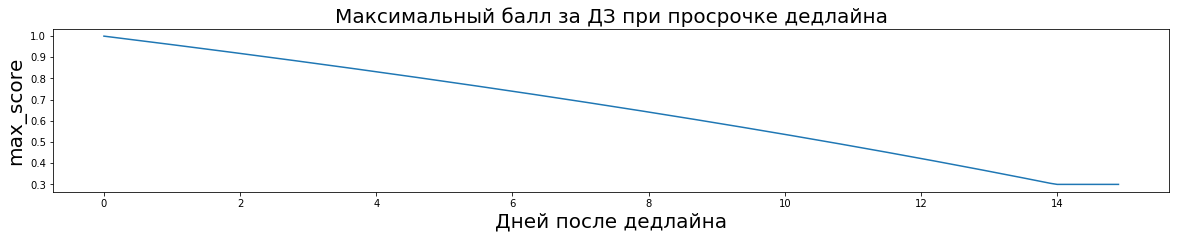

In [51]:
epsilon = np.array(range(150))/10.0
max_score = np.array([max([0.3,  np.log(1.23+0.77*max([0, (1-x/14)]))/np.log(2)])  for x in epsilon])

plt.figure(figsize=(20,3))
plt.title('Максимальный балл за ДЗ при просрочке дедлайна', fontsize=20)
plt.plot(epsilon, max_score)
plt.ylabel('max_score', fontsize=20)
plt.xlabel('Дней после дедлайна', fontsize=20)

** Бонус **
- бонусный балл (максимум 3 балла за семестр) выставляется за 
    - отлично решённое ДЗ
    - активную работу на семинаре
    
**Экзамен**
- Будет экзамен, автоматов не будет
    - максимум за экзамен 3 балла
    - список билетов
    - теорминимум
    - дополнительный вопрос
    
**Оценка**
Финальная оценка будет вычисляться, как
##     $$mark = \frac{2}{3}\cdot (hw\_credits + bonus\_credits + exam\_creidts)$$

<h1 align="center">Reminder: </h1>

#  Linear Regression
** Вопросы **
* Как выглядит решающее правило в LR?
* Как настриваются веса в LR?
* Какие проблемы возникают при обучении LR? С чем связано переобучение LR?
* Что такое гребневая регрессия и Лассо Тибширани?

## $$Y = \mathbf{R},~X\in \mathbf{R}^d$$
## $$y_{predict}(x) = <w, x> $$ 
## $$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Linear Regression (Equation)

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Normal Equation

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

## Регуляризация

<img src="https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/09_linear_models/496/pic/Regularization.PNG?raw=true" width="70%">

### Regularization for LR:

## $$ \begin{cases} Q_{\tau}(\alpha) = \| F\alpha - y\|^2 + \tau \| \alpha \|^2\\
\sum_{i=1}^{n} |\alpha_i| \leq C
        \end{cases} $$

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

# Man-hours prediction (Прогнозирование трудозатрат склада)

<img src="http://www.abr.com/wp-content/uploads/2014/04/Inventory-Management_4.7.15.jpg" width=100%>

К вам обращается крупная Retail-компания с целью решить задачу предсказания трудозатрат на Распределительном центре.


* ** Описание задачи **
Через распределительный центр ежедневного проходит $10^5-10^8$ штук товаров, хранится при этом в 10 раз больше товаров. Все товары делятся на $n=5$ групп (например, Яблоки, Бананы, Кокосы, Апельсины и Баклажан), и в компании есть планы по нагрузке на РЦ по каждой группе: т.е. инфо о количестве товаров, которые придут на РЦ, и которые будут отгружены в РЦ.

Операции (бизнес-процессы), которые проходит каждая штука, очень сложны и разнообразны, у компании нет возможности отслеживать движение каждой штуки на РЦ. 



Логистическая дирекция просит вас помочь:
 1) научить взвешивать трудоёмкость обработки каждой из групп товаров;
 2) постройте калькулятор трудозатрат на склад: т.е. программу, которая могла бы пересчитывать нагрузку в штуках в количество человек, которое нужно нанять, чтобы обработать эту нагрузку.


* ** Бизнес-ограничения **
    1. Логистическая дирекция постоянно оптимизирует бизнес-процессы, так что производительность опытных сотрудников склада монотонно неубывает.
    2. На складе происходит постоянная ротация персонала, доля новичков может меняться из месяца в месяц.
        * Так, например, В ноябре и декабре на складе наступает пиковая нагрузка, которая в 3 раза превышает среднегодовую! В связи с этим в ноябре на складе больше половины новых сотрудкников - новички.
        * Упрощение: будем считать, что отношение производительности новичка к производительности опытного сотрудника = 0.65 (константа).
    3. Есть планы на год вперёд (при планировании бюджета - 1 раз в год), и есть планы еженедельные о нагрузке на следующую неделю:
     * Какой вы думаете должна быть допустимая ошибка вашего прогноза в обоих случаях?
    4. При прогнозировании ежендельном: 
        * если НЕДОпредсказать нагрузку, то компания может потерять деньги, из-за того, что не весь товар будет отправлен на продажу, 
        * если предсказать трудозатрат больше, чем будет, то комания переплатит (оплата за полную смену, а работы всего не полсмены). 
    5. У вас есть следующие данные: 1) нагрузка по каждой из групп товаров за каждый день за 2,5 года назад 2) количество людей в смене (в разбивке новичок/опытный) 3) дата начала и дата окончания смены.    
   
   
* ** Как измерить результат **
    1. Можно измерить, какая была ошибка при экспертном планировании (при еженедльном ~20%, при годовом ~10%), и какая стала при внедрении калькулятора.
    2. Понимание того, какой вклад даёт каждая из групп товаров, позволяет более тонко управлять (развивать) процессы на складе (т.е. вы сделали процесс более прозрачным).
    3. Возможность пересчитывать нагрузки в одну единицу (например 1 Яблоко = 3 Банана) приводит к более чёткому взаимодействию в другими подразделениями. Например, можно говорить о максимльной пропускной способности в Яблоках(т.е. вы упростили процесс коммуникации).
    
    
* **Вопросы:**
    1. Как поставить задачу машинного обучения? Что есть целевая переменная?
    2. Какие признаки следует добавить в обучающую выборку? Сколько их будет?
    3. Какое взять решающее правило? 
    4. Как настроить параметры? Не забудьте про постоянное изменение производительности на РЦ
    5. Как часто стоит пересчитывать параметры?

<h1 align="center"> Simple Autoregression Model</h1>

## Пример временного ряда: energy consumption data

In [64]:
# Caution: different version of pandas needs differnt codes!!!
# ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',')
# Dataset: https://github.com/ml-mipt/ml-mipt-part2/blob/master/2017/seminars/0_ts_intro/consumption_train.csv

ts = pd.read_csv('consumption_train.csv', sep='\t', decimal='.', parse_dates=True, dayfirst=False, index_col='Dates') 
ts[['EnergyCons']].head(10)

,EnergyCons
Dates,
2005-01-01 00:00:00,1290
2005-01-01 01:00:00,1266
2005-01-01 02:00:00,1273
2005-01-01 03:00:00,1280
2005-01-01 04:00:00,1293
2005-01-01 05:00:00,1263
2005-01-01 06:00:00,1279
2005-01-01 07:00:00,1304
2005-01-01 08:00:00,1330


Временной ряд - это последовательность значний некоторой величины, зафиксированные через одинаковые промежутки времени.

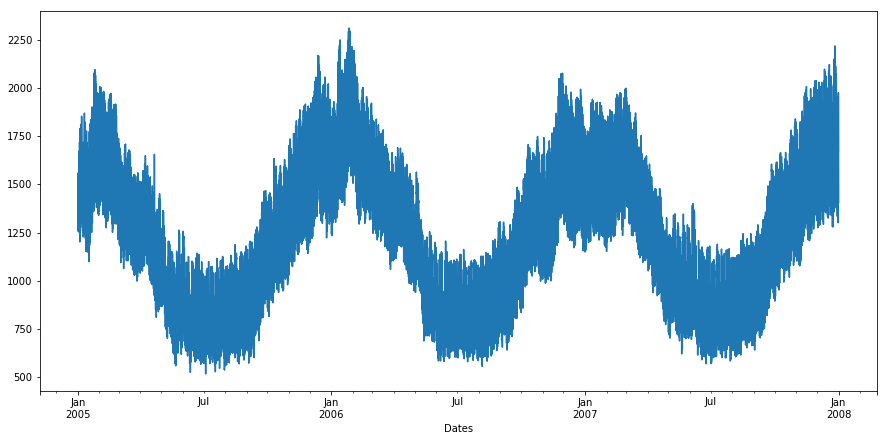

In [57]:
# Plot time series
ts['EnergyCons'].plot(figsize=(15,7))

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

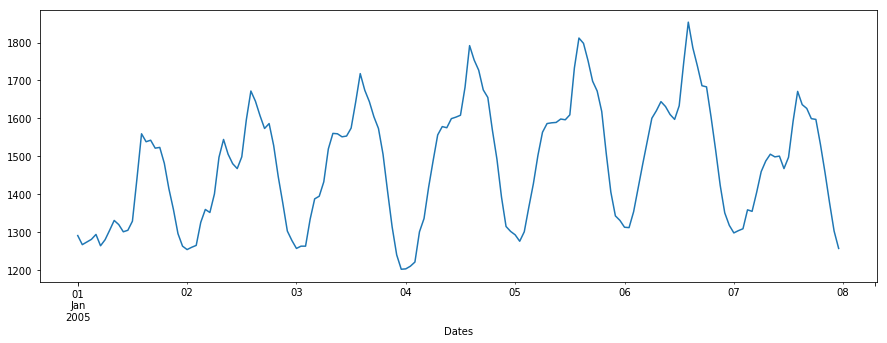

In [58]:
# the first week
# ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', 'EnergyCons'].plot(figsize=(15,5)) # Python 2
ts.loc['2005-01-01 00:00:00':'2005-01-07 23:00:00', 'EnergyCons'].plot(figsize=(15,5)) # Python 3

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

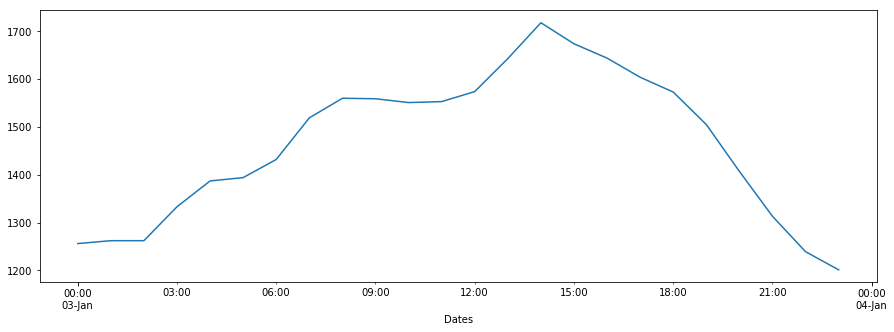

In [59]:
# the first day
ts.loc['2005-01-03 00:00:00':'2005-01-03 23:00:00', 'EnergyCons'].plot(figsize=(15,5))

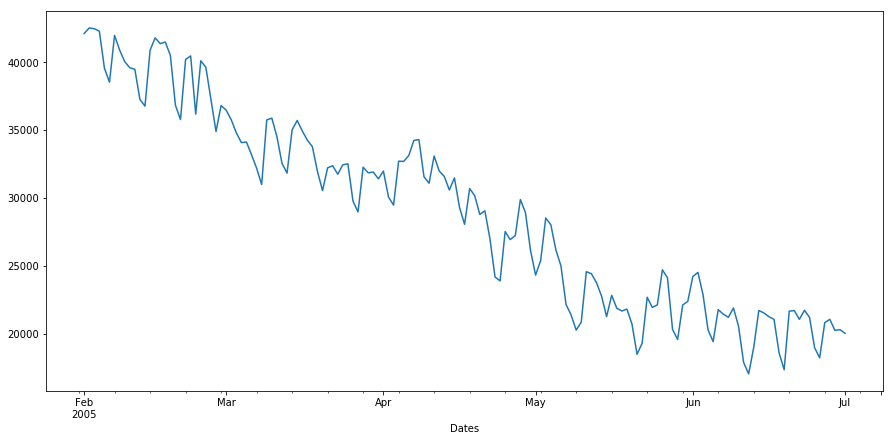

In [60]:
ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot(figsize=(15,7))

** Вопрос: ** Какие закономерности в данных можно наблюдать на картинке?

## STL-decomposition: разложение ВР на тренд-сезонность-шум

In [61]:
import statsmodels.api as sm

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


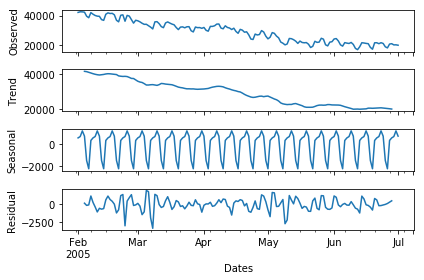

In [80]:
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].loc['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
# fig = plt.figure(figsize=(12,3))
# ax = fig.add_subplot(111)
ax = res.plot();
# resplot = res.plot()

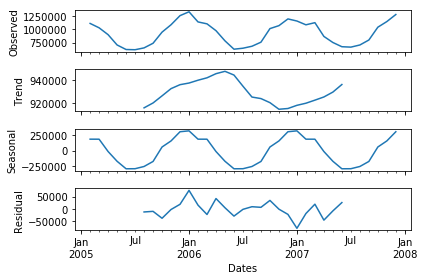

In [66]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].loc['2005-02-01 00:00':'2008-01-01 23:00'].resample("M").sum())
resplot = res.plot()

** Вопрос: ** Как спрогнозировать такой временной ряд?
 - Подсказка: как описать зависимость последующих значений временного ряда от предыдущего?

## Autoregression: build matrix of autoregression

In [81]:
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [82]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], 
                          np.hstack((x[-K],x[-K:-1]))) # is needed to repeat x[-K] in second part
    y = x[K+h-1:]
    return X,y

## Forecast for next hour (h=1) using 1 week history (K=168)

In [83]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].loc['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].loc['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [84]:
print (X_train.shape)
print (y_train.shape)

(8593, 168)
(8593,)


In [85]:
# Matrix of Samples and Regressors
X_train

array([[1290, 1266, 1273, ..., 1377, 1302, 1256],
       [1266, 1273, 1280, ..., 1302, 1256, 1257],
       [1273, 1280, 1293, ..., 1256, 1257, 1267],
       ...,
       [1332, 1293, 1225, ..., 1645, 1541, 1394],
       [1293, 1225, 1235, ..., 1541, 1394, 1349],
       [1225, 1235, 1222, ..., 1394, 1349, 1312]], dtype=int64)

In [86]:
# Target Vector
y_train

Dates
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
2005-01-08 05:00:00    1400
2005-01-08 06:00:00    1439
2005-01-08 07:00:00    1504
2005-01-08 08:00:00    1557
2005-01-08 09:00:00    1518
2005-01-08 10:00:00    1500
2005-01-08 11:00:00    1501
2005-01-08 12:00:00    1546
2005-01-08 13:00:00    1645
2005-01-08 14:00:00    1718
2005-01-08 15:00:00    1701
2005-01-08 16:00:00    1655
2005-01-08 17:00:00    1635
2005-01-08 18:00:00    1616
2005-01-08 19:00:00    1530
2005-01-08 20:00:00    1435
2005-01-08 21:00:00    1349
2005-01-08 22:00:00    1266
2005-01-08 23:00:00    1247
2005-01-09 00:00:00    1227
2005-01-09 01:00:00    1252
2005-01-09 02:00:00    1250
2005-01-09 03:00:00    1298
2005-01-09 04:00:00    1355
2005-01-09 05:00:00    1384
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30 23:

Train score: 0.997, Test score: 0.991


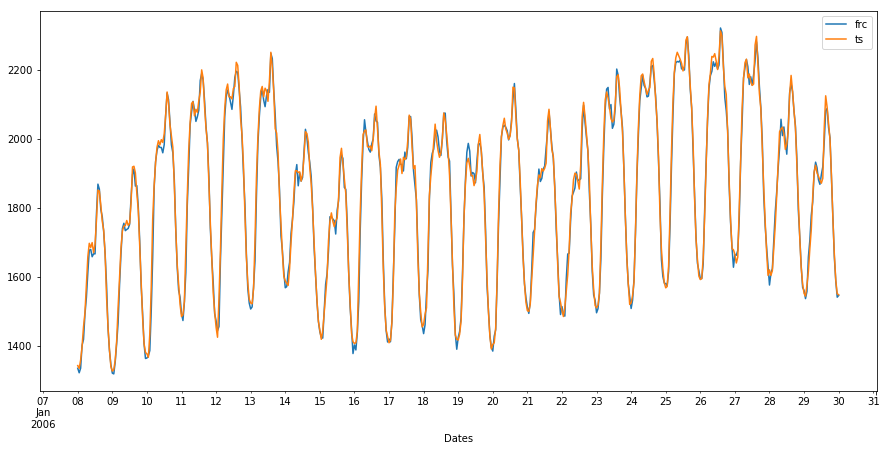

In [87]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,7))

## Try another delay: h=168

Train score: 0.933, Test score: 0.839


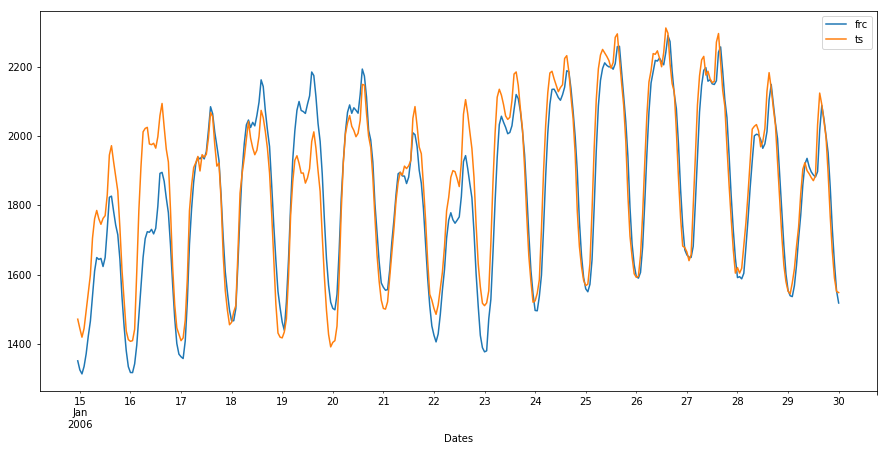

In [88]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].loc['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].loc['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}).plot(figsize=(15,7))

## Practical Task
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting. You should write code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors for LR in experiment as much as you want.   

In [91]:
# write your code here


<h1 align="center"> Conclusion </h1>

# Обратная связь 
   * <span style="font-size: 11pt"> <a href="https://goo.gl/forms/zSEynRUOCIO1SXv02"> отзыв </a> о семинаре </a>

## Answer questions 
  ** 1. What is time series? **
     
     <Answer>
       
  ** 2. What is delay and horizon of forecast?**
   
     <Answer>
         
  ** 3. What is Least Squared Method for Linear Regression?**
  
     <Answer>
          
  ** 4. What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? **
  
     <Answer>
          
  ** 5. Write down main problems of LS method. **
  
     <Answer>
          
  ** 6. What hankel transformation of a matrix? **
  
     <Answer>
          